In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score


In [3]:
# load the csv file from Kaggle
dataframe = pd.read_csv("/content/drive/MyDrive/projects/Credit Card Fraud Detection ML/creditcard.csv")
dataframe.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# check for null values in the credit card dataset
dataframe.isnull().values.any()

False

In [5]:
# print the Amount feature in the dataset as we are mostly intrested in this feature for fraud detection
dataframe['Amount'].describe()

,Amount
count,284807.000000
mean,88.349619
std,250.120109
min,0.000000
25%,5.600000
50%,22.000000
75%,77.165000
max,25691.160000


In [21]:
# check the number of occurences of each class label and plot the information
non_fraud = len(dataframe[dataframe.Class == 0])
fraud = len(dataframe[dataframe.Class == 1])
fraud_percent = (fraud / (fraud + non_fraud) * 100)

print("Number of Genuine Transactions:", non_fraud)
print("Number of Fraudulent Transactions:", fraud)
print("Percentage of Fraudulent Transactions: {:.4f}".format(fraud_percent))

Number of Genuine Transactions: 284315
Number of Fraudulent Transactions: 492
Percentage of Fraudulent Transactions: 0.1727


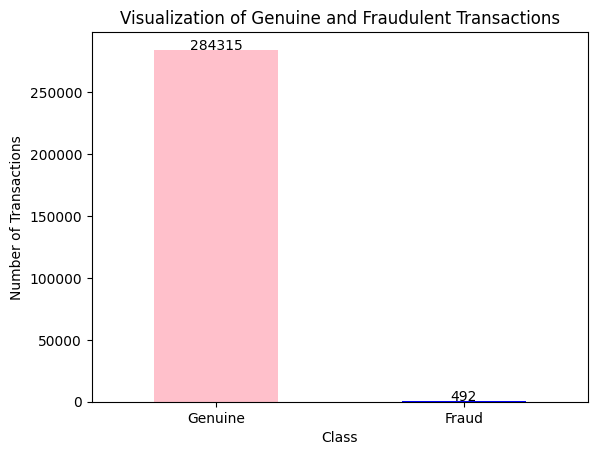

In [23]:
# now plot the above information
# we use matplot.lib

labels = ["Genuine", "Fraud"]
colors = ['pink', 'blue']
count_classes = dataframe.value_counts(dataframe['Class'], sort = True)
count_classes.plot(kind = "bar", rot =0, color = colors)

plt.title("Visualization of Genuine and Fraudulent Transactions")
plt.ylabel("Number of Transactions")
plt.xticks(range(2), labels)

# Annotate bars with values
for i, value in enumerate(count_classes):
    plt.text(i, value , str(value), ha='center', fontsize=10)

plt.show()

More than 99% of the transactions are genuine, this is not an ideal case. Applying a scaling techniques on the "Amount" feature to transform the range of values. We will drop the original "Amount" column and add a new column with the scaled values. The "Time" column is also irrelevant in our case so we can drop it.

In [26]:
import numpy as np
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dataframe["Normalized_Amount"] = scaler.fit_transform(dataframe["Amount"].values.reshape(-1, 1))
dataframe.drop(["Amount", "Time"], inplace=True, axis=1)

Y = dataframe["Class"]
X = dataframe.drop(["Class"], axis=1)

Now we can split the data into testing and training sets. We split the credit card data using a 70-30 split using train_test_split(). 30% of the data goes to the test set (test_X, test_Y).
70% of the data is used for training (train_X, train_Y)

In [28]:
from sklearn.model_selection import train_test_split

(train_X, test_X, train_Y, test_Y) = train_test_split(X, Y, test_size= 0.3, random_state = 42)

print("Shape of train_X: ", train_X.shape)
print("Shape of test_X: ", test_X.shape)


Shape of train_X:  (199364, 29)
Shape of test_X:  (85443, 29)


# Step 2: Apply Machine Learning Algorithms to Credit Card Dataset

Let’s train different models on our dataset and observe which algorithm works better for our problem. This is actually a binary classification problem as we have to predict only 1 of the 2 class labels. We can apply a variety of algorithms for this problem like **Random** **Forest**, **Decision** **Tree**, **Support** **Vector** **Machine** **algorithms**, etc.

In this machine learning project, we build Random Forest and Decision Tree classifiers and see which one works best.

The **Decision Tree** algorithm is a supervised machine learning algorithm used for *classification* and *regression* tasks. The algorithm’s aim is to build a training model that predicts the value of a target class variable by learning simple if-then-else decision rules inferred from the training data.

**Random forest** is a supervised machine learning algorithm. It creates a “forest” out of an *ensemble of “decision trees”*, which are normally trained using the “bagging” technique. The bagging method’s basic principle is that combining different learning models improves the outcome.

Next we are going to build a Random Forest and a Decision Tree Classifier.

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Decision Tree
decision_tree = DecisionTreeClassifier()

# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)


# Step 3: Train and Evaluate the Models on the Dataset

Train the decision tree and random forest models on the dataset using the fit() function. Record the predictions made by the models using the predict() function and evaluate.

In [33]:
decision_tree.fit(train_X, train_Y)
predictions_dt = decision_tree.predict(test_X)
decision_tree_score = decision_tree.score(test_X, test_Y) * 100

random_forest.fit(train_X, train_Y)
predictions_rf = random_forest.predict(test_X)
random_forest_score = random_forest.score(test_X, test_Y) * 100

print("Decision Tree Score: ", decision_tree_score)
print("Random Forest Score: ", random_forest_score)

Decision Tree Score:  99.90168884519505
Random Forest Score:  99.9602073897218


The Random Forest model seems to have a higher edge compared to the Decision Tree.

Now we will create a function to print the following metrics:
accuracy, precision, recall, and f1-score.

1.   accuracy: Measures the percentage of correct predictions out of total predictions
2.   precision: How many predicted frauds are actually fraud?


1.   recall: How many actual frauds did the model catch?
2.   f1-score: Balances Precision & Recall (useful when there's an imbalance)






In [45]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score

def metrics(actuals, predictions):
  print("Accuracy: {:.5f}".format(accuracy_score(actuals, predictions)))
  print("Precision; {:.5f}".format(precision_score(actuals, predictions)))

  print("Recall: {:.5f}".format(recall_score(actuals, predictions)))
  print("F1-score: {:.5f}".format(f1_score(actuals, predictions)))

# Confusion Matrix and Evaluation Metrics of Decision Tree Model

Confusion Matrix - Decision Tree
[[85253    54]
 [   30   106]]
Evaluation Metrics - Decision Tree
Accuracy: 0.99902
Precision; 0.66250
Recall: 0.77941
F1-score: 0.71622


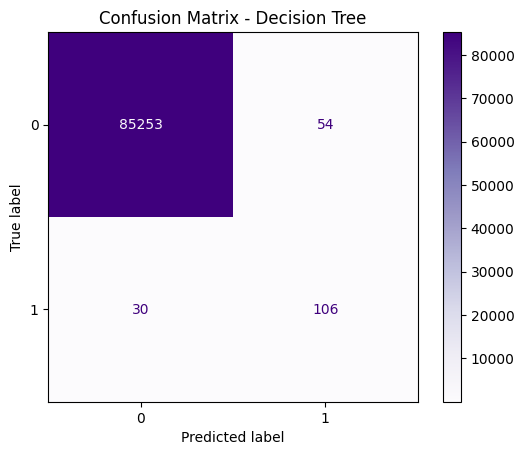

In [56]:
# visualize the confusion matrix and the evaluation metrics of our Decision Tree Model
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report

confusion_matrix_dt = confusion_matrix(test_Y, predictions_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt)

print("Evaluation Metrics - Decision Tree")
metrics(test_Y, predictions_dt.round())

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_dt, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Purples)  # Use a color map for better visualization
plt.title("Confusion Matrix - Decision Tree")
plt.show()


66% of fraud predictions are correct, meaning 34% were false alarms.
The model correctly identified 77.9% of fraud cases, but missed 22.1%.
The model achieves a good balance but still has room for improvement.

# Confusion Matrix and Evaluation Metrics of Random Forest Model

Confusion Matrix - Random Forest
[[85299     8]
 [   26   110]]
Evaluation Metrics - Decision Tree
Accuracy: 0.99960
Precision; 0.93220
Recall: 0.80882
F1-score: 0.86614


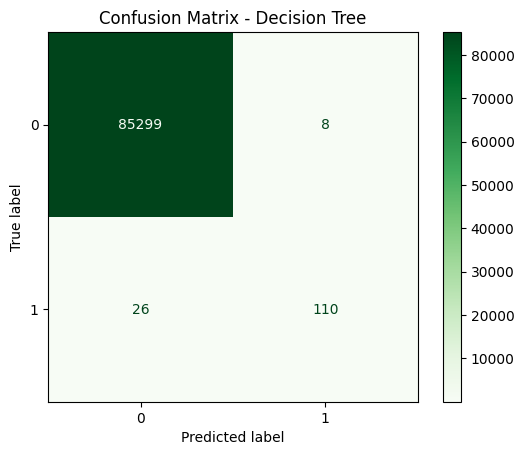

In [59]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report

confusion_matrix_rf = confusion_matrix(test_Y, predictions_rf.round())
print("Confusion Matrix - Random Forest")
print(confusion_matrix_rf)

print("Evaluation Metrics - Decision Tree")
metrics(test_Y, predictions_rf.round())

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_rf, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Greens)  # Use a color map for better visualization
plt.title("Confusion Matrix - Decision Tree")
plt.show()

In both cases, there is an imbalance of data. There are far more genuine transactions that fraudulent ones which creates this imbalance. This could affect the sampling and training of the models such as giving more attention to the genuine transactions and hence obtaining a better accuracy for those. We can use the oversampling of the minority class method to mitigate this imbalance (The ** Synthetic Minority Oversampling Technique**, or SMOTE for short, is a method of data augmentation for the minority class). The SMOTE method is available in the imblearn package. Let’s import that and resample our data.

In [61]:
# Performing Oversampling on RF and DT

from imblearn.over_sampling import SMOTE

X_resampled, Y_resampled = SMOTE().fit_resample(X, Y)
print("Resampled shape of X: ", X_resampled.shape)
print("Resampled shape of Y: ", Y_resampled.shape)

value_counts = Counter(Y_resampled)
print(value_counts)

(train_X, test_X, train_Y, test_Y) = train_test_split(X_resampled, Y_resampled, test_size= 0.3, random_state = 42)

Resampled shape of X:  (568630, 29)
Resampled shape of Y:  (568630,)
Counter({0: 284315, 1: 284315})


Apply the Random Forest algorithm to the resampled data:

In [62]:
rf_resampled = RandomForestClassifier(n_estimators=100)
rf_resampled.fit(train_X, train_Y)

predictions_resampled = rf_resampled.predict(test_X)
random_forest_score_resampled = rf_resampled.score(test_X, test_Y) * 100

print("Random Forest Score: ", random_forest_score_resampled)


Random Forest Score:  99.98710350608772


Confusion Matrix - Random Forest
[[85127    22]
 [    0 85440]]
Evaluation of Random Forest Model
Accuracy: 0.99987
Precision; 0.99974
Recall: 1.00000
F1-score: 0.99987


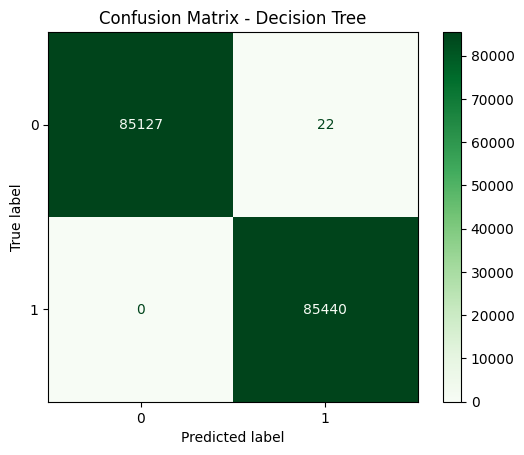

In [65]:
confusion_matrix_resampled = confusion_matrix(test_Y, predictions_resampled.round())
print("Confusion Matrix - Random Forest")
print(confusion_matrix_resampled)

print("Evaluation of Random Forest Model")
metrics(test_Y, predictions_resampled.round())

# Plot the confusion matrix
disp_cmr = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_resampled, display_labels=[0, 1])
disp_cmr.plot(cmap=plt.cm.Greens)  # Use a color map for better visualization
plt.title("Confusion Matrix - Decision Tree")
plt.show()

Now, clearly our model performed much better than the previous Random Forest classifier without oversampling.